In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/content/HousingData.csv")

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


In [5]:
data.isnull().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [6]:
x = data.iloc[:,0:13]
y = data.iloc[:,-1]

In [7]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=
0.2,random_state=0)

In [8]:
import sklearn

In [9]:
from sklearn.impute import SimpleImputer

# Fit on xtrain, transform both xtrain and xtest
imputer = SimpleImputer(strategy='mean')
xtrain = imputer.fit_transform(xtrain)
xtest = imputer.transform(xtest)

# Now train and predict
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(xtrain, ytrain)

ytrain_pred = lm.predict(xtrain)
ytest_pred = lm.predict(xtest)


In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lm=LinearRegression()

In [12]:
model=lm.fit(xtrain, ytrain)

In [13]:
ytrain_pred=lm.predict(xtrain)
ytest_pred=lm.predict(xtest)

In [14]:
df=pd.DataFrame(ytrain_pred,ytrain)

In [15]:
df=pd.DataFrame(ytest_pred,ytest)

In [16]:
from sklearn.metrics import mean_squared_error,r2_score

In [17]:
mse=mean_squared_error(ytest,ytest_pred)

In [18]:
print(mse)

34.99330686034026


In [19]:
mse=mean_squared_error(ytrain_pred,ytrain)

In [20]:
print(mse)

20.023850985554912


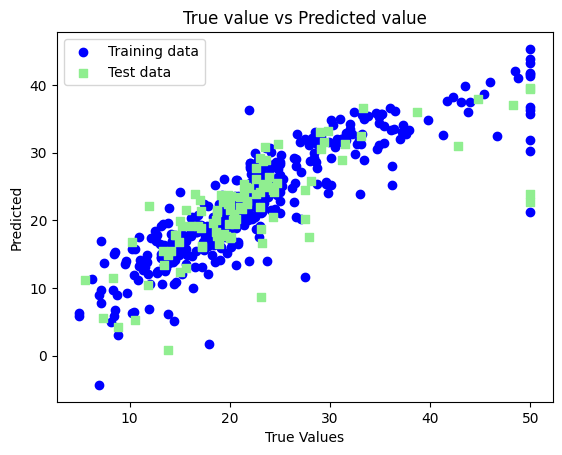

In [21]:
plt.scatter(ytrain,ytrain_pred,c='blue',marker='o',label='Training data')
plt.scatter(ytest,ytest_pred,c='lightgreen',marker='s',label='Test data')
plt.xlabel('True Values')
plt.ylabel('Predicted')
plt.title("True value vs Predicted value")
plt.legend(loc='upper left')
plt.plot()
plt.show()